In [1]:
import SpatialDE

import numpy as np
import scipy
import pandas as pd
import scanpy as sc
import anndata as ad

from tqdm.auto import trange, tqdm

import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
from plotnine import *
import mizani

theme_set(theme_bw())
theme_update(legend_key=element_blank(), text=element_text(family="Helvetica"))

In [2]:
data = sc.read_visium("mouse_brain_visium_wo_cloupe_data/rawdata/ST8059048")
data.var_names_make_unique()
data.var["mt"] = data.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(data, qc_vars=["mt"], inplace=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/kats/.local/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.


In [3]:
sc.pp.filter_cells(data, min_counts=4000)
data = data[data.obs["pct_counts_mt"] < 20]
sc.pp.filter_genes(data, min_cells=100)

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Trying to set attribute `.var` of view, copying.


In [5]:
svg_full, _ = SpatialDE.test(data, omnibus=True)
svg_full["total_counts"] = np.asarray(data.X.sum(axis=0)).squeeze()
svg_full.to_pickle("ST8059048_svg_full.pkl")

  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/kats/.local/li

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/kats/.local/li

KeyboardInterrupt: 

In [4]:
svg_full = pd.read_pickle("ST8059048_svg_full.pkl")

In [5]:
svg_full[svg_full.padj < 0.001].shape[0]

5863

In [6]:
vargenes = svg_full[svg_full.padj < 0.001].sort_values("total_counts", ascending=False).gene[:2000]
segm_default, _ = SpatialDE.tissue_segmentation(data, genes=vargenes, rng=np.random.default_rng(seed=42))
data.obs["segmentation_labels_default"] = data.obs.segmentation_labels
segm_adj, _ = SpatialDE.tissue_segmentation(data, genes=vargenes, rng=np.random.default_rng(seed=42), params=SpatialDE.TissueSegmentationParameters(smoothness_factor=5))

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
... storing 'feature_types' as categorical
... storing 'genome' as categorical


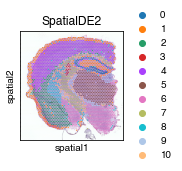

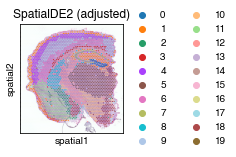

In [7]:
with rc_context({"figure.figsize": (2, 2)}):
    sc.pl.spatial(data, color="segmentation_labels_default", title="SpatialDE2", return_fig=True).savefig("figures/3a_default.svg")
    sc.pl.spatial(data, color="segmentation_labels", title="SpatialDE2 (adjusted)", return_fig=True).savefig("figures/3a_adjusted.svg")

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/kats/.local/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:144: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


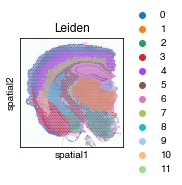

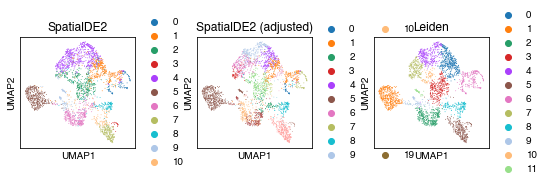

In [8]:
data_normalized = data.copy()
sc.pp.normalize_total(data_normalized, target_sum=1e4, key_added="scaling_factor")
data_norm_reg = data_normalized.copy()
sc.pp.log1p(data_norm_reg)
variable = sc.pp.highly_variable_genes(data, flavor="seurat_v3", inplace=False, n_top_genes=2000)
data_norm_reg = data_normalized.copy()
sc.pp.log1p(data_norm_reg)
data_norm_reg = data_norm_reg[:, vargenes]
sc.pp.regress_out(data_norm_reg, ['total_counts'])
sc.pp.scale(data_norm_reg, max_value=10)
sc.tl.pca(data_norm_reg, n_comps=100)
sc.pp.neighbors(data_norm_reg, n_neighbors=20, n_pcs=80)
sc.tl.leiden(data_norm_reg, random_state=42)
sc.tl.umap(data_norm_reg)

with rc_context({"figure.figsize": (2, 2)}):
    sc.pl.spatial(data_norm_reg, color="leiden", title="Leiden", return_fig=True).savefig("figures/3a_leiden.svg")
    sc.pl.umap(data_norm_reg, size=3, color=["segmentation_labels_default", "segmentation_labels", "leiden"], title=["SpatialDE2", "SpatialDE2 (adjusted)", "Leiden"], return_fig=True, ncols=3).savefig("figures/s3c.svg")

In [9]:
resolutions = (0.1, 0.5, 1., 1.5, 2., 3., 4.)
smoothnesses = (0.5, 1., 2., 3., 5., 8., 10.)

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


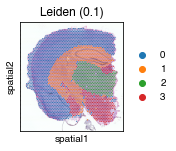

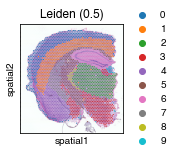

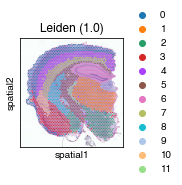

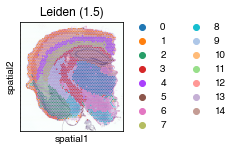

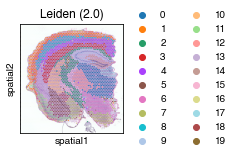

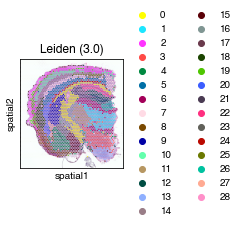

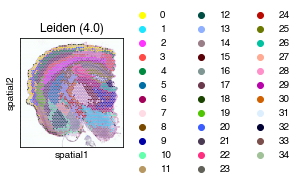

In [10]:
data_norm_reg.obs["leiden_1.0"] = data_norm_reg.obs.leiden
with rc_context({"figure.figsize": (2, 2)}):
    for res in resolutions:
        sc.tl.leiden(data_norm_reg, random_state=42, resolution=res, key_added=f"leiden_{res}")
        sc.pl.spatial(data_norm_reg, color=f"leiden_{res}", return_fig=True, title=f"Leiden ({res})").savefig(f"figures/s3b_{res}.svg")

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


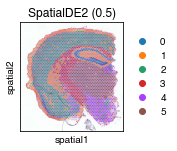

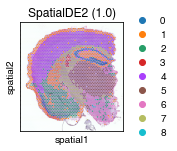

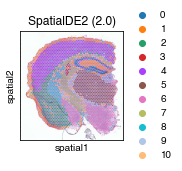

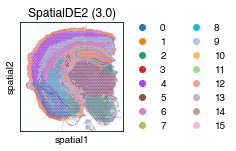

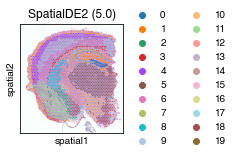

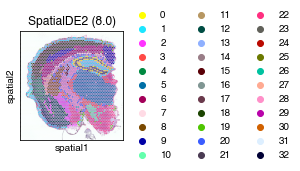

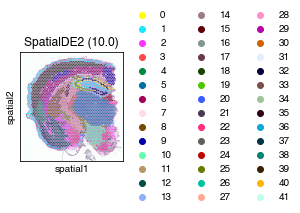

In [11]:
testdata = data.copy()
with rc_context({"figure.figsize": (2, 2)}):
    for smoothness in smoothnesses:
        segm_adj, _ = SpatialDE.tissue_segmentation(testdata, genes=vargenes, rng=np.random.default_rng(seed=42), params=SpatialDE.TissueSegmentationParameters(smoothness_factor=smoothness))
        sc.pl.spatial(testdata, color=f"segmentation_labels", return_fig=True, title=f"SpatialDE2 ({smoothness})").savefig(f"figures/s3a_{smoothness}.svg")

In [12]:
nresamples = 100
totals = (20e6, 10e6, 5e6, 1e6)

In [ ]:
obs = data.obs.copy()
for i in trange(nresamples):
    bdata = data.copy()
    bdata.X.data = np.random.default_rng(seed=i).multinomial(bdata.X.data.sum(), bdata.X.data.astype(np.uint16) / bdata.X.data.astype(np.uint16).sum())
    bdata.obs.total_counts = bdata.X.sum(axis=1)
    
    segm, _ = SpatialDE.tissue_segmentation(bdata, genes=vargenes, rng=np.random.default_rng(seed=42))
    obs[f"segmentation_labels_bootstrap_{i}"] = bdata.obs.segmentation_labels
    
    sc.pp.normalize_total(bdata, target_sum=1e4, key_added="scaling_factor")
    bdata = bdata[:, vargenes]
    sc.pp.regress_out(bdata, ['total_counts'])
    sc.pp.scale(bdata, max_value=10)
    sc.tl.pca(bdata, n_comps=100)
    sc.pp.neighbors(bdata, n_neighbors=20, n_pcs=80)
    sc.tl.leiden(bdata, random_state=42)
    obs[f"leiden_bootstrap_{i}"] = bdata.obs.leiden
    
    for total in totals:
        cdata = sc.pp.downsample_counts(data, total_counts=total, copy=True, random_state=i)
        cdata.obs.total_counts = cdata.X.sum(axis=1)
        
        for smoothness in smoothnesses:
            segm, _ = SpatialDE.tissue_segmentation(cdata, genes=vargenes, rng=np.random.default_rng(seed=42), params=SpatialDE.TissueSegmentationParameters(smoothness_factor=smoothness))
            obs[f"segmentation_labels_{total:.0e}_{i}_{smoothness}"] = cdata.obs.segmentation_labels

        sc.pp.normalize_total(cdata, target_sum=1e4, key_added="scaling_factor")
        cdata = cdata[:, vargenes]
        sc.pp.regress_out(cdata, ['total_counts'])
        sc.pp.scale(cdata, max_value=10)
        sc.tl.pca(cdata, n_comps=100)
        sc.pp.neighbors(cdata, n_neighbors=20, n_pcs=80)
        for res in resolutions:
            sc.tl.leiden(cdata, random_state=42, resolution=res)
            obs[f"leiden_{total:.0e}_{i}_{res}"] = cdata.obs.leiden
obs.to_pickle("data_obs.pkl")
data.write_h5ad("data.h5ad")

In [13]:
data = ad.read_h5ad("data.h5ad")
obs = pd.read_pickle("data_obs.pkl")
data.obs = obs

In [14]:
def split_join_metric(obs1, obs2):
    cl1 = np.unique(obs1)
    cl2 = np.unique(obs2)
    
    cp1 = {c: 0 for c in cl1}
    cp2 = {c: 0 for c in cl2}
    for ccl1 in cl1:
        cobs1 = obs1 == ccl1
        for ccl2 in cl2:
            intersect = np.sum(cobs1 & (obs2 == ccl2))
            cp1[ccl1] = max(cp1[ccl1], intersect)
            cp2[ccl2] = max(cp2[ccl2], intersect)
    p1 = sum(cp1.values())
    p2 = sum(cp2.values())
    return 2 * len(obs1) - p1 - p2

In [15]:
data.obs["leiden"] = data_norm_reg.obs.leiden
dists = (pd.concat([
            pd.DataFrame.from_records([(i, split_join_metric(data.obs.segmentation_labels_default, data.obs[f"segmentation_labels_bootstrap_{i}"]), "SpatialDE") for i in range(nresamples)], columns=["resample", "dist", "method"]),
            pd.DataFrame.from_records([(i, split_join_metric(data.obs.leiden, data.obs[f"leiden_bootstrap_{i}"]), "Leiden") for i in range(nresamples)], columns=["resample", "dist", "method"])
        ], axis=0).groupby("method", as_index=False).
            agg(y=("dist", np.mean),
                ymin=("dist", lambda x: x.mean() - x.std()),
                ymax=("dist", lambda x: x.mean() + x.std()))
       )
(
    ggplot(
        dists,
        aes(x="method", y="y", ymin="ymin", ymax="ymax")) +
    geom_bar(stat='identity') +
    geom_errorbar() +
    labs(x=None, y="split / join distance") +
    theme(figure_size=(2,2))
).save("figures/3c.svg")

/home/kats/.local/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 2 x 2 in image.
/home/kats/.local/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/3c.svg


In [16]:
dists

,method,y,ymin,ymax
0,Leiden,694.25,572.679937,815.820063
1,SpatialDE,585.76,469.425745,702.094255


In [17]:
dists_spatialde = pd.DataFrame.from_records([(total, i, sm, split_join_metric(data.obs.segmentation_labels_default, data.obs[f"segmentation_labels_{total:.0e}_{i}_{sm}"])) for total in totals for i in range(nresamples) for sm in smoothnesses], columns=["depth", "resample", "smoothness", "dist"])
mean_dists = dists_spatialde.groupby(["depth", "smoothness"], as_index=False).agg(mean_dist=("dist", np.mean))
spatialde_optimal = mean_dists.loc[mean_dists.groupby("depth")["mean_dist"].idxmin()]

dists_leiden = pd.DataFrame.from_records([(total, i, sm, split_join_metric(data.obs.leiden, data.obs[f"leiden_{total:.0e}_{i}_{sm}"])) for total in totals for i in range(nresamples) for sm in resolutions], columns=["depth", "resample", "res", "dist"])
mean_dists = dists_leiden.groupby(["depth", "res"], as_index=False).agg(mean_dist=("dist", np.mean))
leiden_optimal = mean_dists.loc[mean_dists.groupby("depth")["mean_dist"].idxmin()]

In [18]:
def label(x):
    if x == 0:
        return "0.0"
    exp = np.floor(np.log10(x))
    factor = x / (10 ** exp)
    return f"${factor:.1f}\\! \\times\\! 10^{{{int(exp)}}}$"
dists_spatialde = dists_spatialde.set_index(["depth", "smoothness"]).loc[spatialde_optimal.set_index(["depth", "smoothness"]).index].reset_index()
dists_leiden = dists_leiden.set_index(["depth", "res"]).loc[leiden_optimal.set_index(["depth", "res"]).index].reset_index()
dists_spatialde["method"] = "SpatialDE2"
dists_leiden["method"] = "Leiden"
(ggplot(
    pd.concat((dists_spatialde, dists_leiden), axis=0).groupby(["depth", "method"], as_index=False).agg(y=("dist", np.mean),
                                ymin=("dist", lambda x: x.mean() - x.std()),
                                ymax=("dist", lambda x: x.mean() + x.std())),
    aes("depth", "y", ymin="ymin", ymax="ymax", color="method")) + geom_line() + geom_errorbar(width=5e5) +
    labs(x="sequencing depth", y="split/join distance") +
    scale_x_continuous(labels=lambda x: [label(i) for i in x]) +
    theme(figure_size=(2,2), axis_text_x=element_text(rotation=20), legend_title=element_blank())
).save("figures/s3e.svg")

/home/kats/.local/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 2 x 2 in image.
/home/kats/.local/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/s3e.svg


In [19]:
spatialde_optimal

,depth,smoothness,mean_dist
0,1000000.0,0.5,2171.14
10,5000000.0,3.0,1547.52
17,10000000.0,3.0,1353.44
24,20000000.0,3.0,841.47


In [20]:
leiden_optimal

,depth,res,mean_dist
1,1000000.0,0.5,2346.03
9,5000000.0,1.0,1311.49
16,10000000.0,1.0,1038.14
23,20000000.0,1.0,829.35


/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


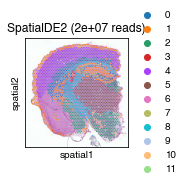

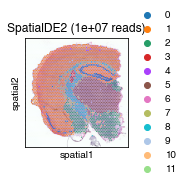

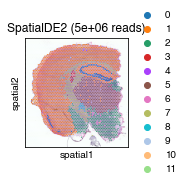

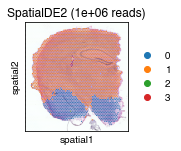

In [21]:
with rc_context({"figure.figsize": (2, 2)}):
    for total, optimal in zip(totals, (3., 3., 3., 0.5)):
        sc.pl.spatial(data, color=f"segmentation_labels_{total:.0e}_0_{optimal}", return_fig=True, title=f"SpatialDE2 ({total:.0e} reads)").savefig(f"figures/3d_{total:.0e}.svg")

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


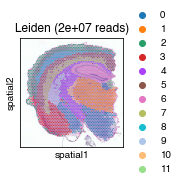

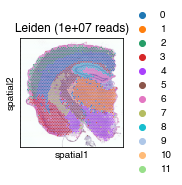

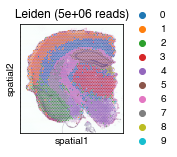

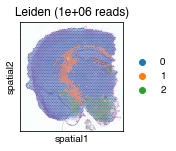

In [22]:
with rc_context({"figure.figsize": (2, 2)}):
    for total, optimal in zip(totals, (1., 1., 1., 0.5)):
        sc.pl.spatial(data, color=f"leiden_{total:.0e}_0_{optimal}", return_fig=True, title=f"Leiden ({total:.0e} reads)").savefig(f"figures/s3d_{total:.0e}.svg")

In [23]:
ulabels, lcounts = np.unique(data.obs.segmentation_labels_default, return_counts=True)
svg_default = []
for l in ulabels[lcounts > 10]:
    csvg, _ = SpatialDE.test(data[data.obs.segmentation_labels_default == l, :], omnibus=True)
    csvg["label"] = l
    svg_default.append(csvg)
svg_default = pd.concat(svg_default, axis=0, ignore_index=True)
svg_default.to_pickle("ST8059048_svg_default.pkl")

ulabels, lcounts = np.unique(data.obs.segmentation_labels, return_counts=True)
svg = []
for l in ulabels[lcounts > 10]:
    csvg, _ = SpatialDE.test(data[data.obs.segmentation_labels == l, :], omnibus=True)
    csvg["label"] = l
    svg.append(csvg)
svg = pd.concat(svg, axis=0, ignore_index=True)
svg.to_pickle("ST8059048_svg.pkl")

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


  0%|          | 0/12682 [00:00<?, ?it/s]

In [ ]:
svg = pd.read_pickle("ST8059048_svg.pkl")

In [24]:
(
    ggplot(svg.assign(region=lambda x: pd.Categorical(x.label))[svg.padj < 0.001], aes("region")) +
        geom_bar() +
        ylab("spatially variable genes") +
        theme(axis_text_x=element_text(rotation=20, ha="right"), figure_size=(4, 2))
).save("figures/3e.svg")

/home/kats/.local/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 4 x 2 in image.
/home/kats/.local/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/3e.svg


In [25]:
from bioservices import BioMart
import goatools
from io import StringIO
s = BioMart()
s.add_dataset_to_xml("mmusculus_gene_ensembl")
s.add_attribute_to_xml("ensembl_gene_id")
s.add_attribute_to_xml("external_gene_name")
s.add_attribute_to_xml("entrezgene_accession")
s.add_attribute_to_xml("entrezgene_id")

s.add_filter_to_xml("ensembl_gene_id", ",".join(data.var.gene_ids.to_numpy()))
res = s.query(s.get_xml())
res = pd.read_table(StringIO(res), names=["ensembl_gene_id", "gene_name", "entrezgene_accession", "entrezgene_id"], dtype={"entrezgene_id": pd.Int32Dtype()})

def filter_entrez(group):
    group = group.drop("ensembl_gene_id", axis=1)
    if group.shape[0] == 1:
        ret = group
    else:
        matched = group[group.gene_name == group.entrezgene_accession]
        if matched.shape[0] > 0:
            ret = matched.iloc[[0],:] # no clear way to choose if there are multiple matches, so I just choose the first one
        else:
            ret = matched
    return ret.drop("entrezgene_accession", axis=1)
res = res.dropna().reset_index(drop=True).groupby("ensembl_gene_id").apply(filter_entrez)

data.var["entrez_id"] = (
    data.var.
    reset_index().
    rename(columns={"index":"gene_name", "gene_ids": "ensembl_gene_id"}).
    merge(
        res.assign(entrezgene_id=res.entrezgene_id.astype(pd.Int32Dtype())),
        on=["gene_name", "ensembl_gene_id"]).
    set_index("gene_name").
    rename_axis(index=None)["entrezgene_id"]
)

In [26]:
from goatools.base import download_go_basic_obo, download_ncbi_associations
from goatools.obo_parser import GODag
from goatools.anno.genetogo_reader import Gene2GoReader
obo_fname = download_go_basic_obo()
fin_gene2go = download_ncbi_associations()
obodag = GODag(obo_fname)
objanno = Gene2GoReader(fin_gene2go, taxids=[10090])
ns2assoc = objanno.get_ns2assc()
background_genes = data.var.entrez_id.to_numpy()

  EXISTS: go-basic.obo
  EXISTS: gene2go
go-basic.obo: fmt(1.2) rel(2021-02-01) 47,291 GO Terms
HMS:0:00:03.906027 385,388 annotations, 24,322 genes, 18,536 GOs, 1 taxids READ: gene2go 


In [27]:
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS
goeaobj = GOEnrichmentStudyNS(background_genes, ns2assoc, obodag, propagate_counts=False, alpha=0.01, methods=['fdr_by'])
go_enrichment = []
for label, g in svg.groupby("label"):
    enrichment = goeaobj.run_study(data.var.entrez_id[g.gene[g.padj < 0.001]].to_numpy().tolist(), prt=None)
    res = []
    for term in enrichment:
        res.append({
            "ont": term.NS,
            "go": term.GO,
            "desc": term.name,
            "study_count": term.study_count,
            "population_count": term.pop_count,
            "study_ratio": np.divide(*term.ratio_in_study),
            "population_ratio": np.divide(*term.ratio_in_pop),
            "pval": term.p_uncorrected,
            "padj": term.p_fdr_by,
            "label": label,
            "genes": data.var.query("entrez_id in @term.study_items").index.to_numpy()
        })
    go_enrichment.append(pd.DataFrame(res))
go_enrichment = pd.concat(go_enrichment, axis=0, ignore_index=True).assign(label=lambda x: pd.Categorical(x.label))


Load BP Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 83% 10,547 of 12,682 population items found in association

Load CC Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 87% 11,024 of 12,682 population items found in association

Load MF Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 79% 10,039 of 12,682 population items found in association


In [29]:
(
    ggplot(go_enrichment[(go_enrichment.padj < 1e-3) & (go_enrichment.ont == "CC")], aes("label", "desc", color="-np.log10(pval)", size="study_ratio")) +
    geom_point() +
    facet_wrap("ont", ncol=1, scales="free") +
    scale_size_area(breaks=[0.1, 0.2, 0.3, 0.4, 0.5], limits=(0.1, 0.5), oob=mizani.bounds.squish, name="fraction of sample") +
    scale_color_distiller(palette="YlGnBu", direction=1, limits=(0, 25), oob=mizani.bounds.squish, name=r"$-\log_{10}(p)$") +
    theme(figure_size=(2,7), subplots_adjust={'hspace': 0.1})
).save("figures/s3f_1.svg")

/home/kats/.local/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 2 x 7 in image.
/home/kats/.local/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/s3f_1.svg


In [30]:
(
    ggplot(go_enrichment[(go_enrichment.padj < 1e-3) & (go_enrichment.ont != "CC")], aes("label", "desc", color="-np.log10(pval)", size="study_ratio")) +
    geom_point() +
    facet_wrap("ont", ncol=1, scales="free") +
    scale_size_area(breaks=[0.1, 0.2, 0.3, 0.4, 0.5], limits=(0.1, 0.5), oob=mizani.bounds.squish, name="fraction of sample") +
    scale_color_distiller(palette="YlGnBu", direction=1, limits=(0, 25), oob=mizani.bounds.squish, name=r"$-\log_{10}(p)$") +
    theme(figure_size=(2,7), subplots_adjust={'hspace': 0.2})
).save("figures/s3f_2.svg")

/home/kats/.local/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 2 x 7 in image.
/home/kats/.local/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/s3f_2.svg


/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/kats/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


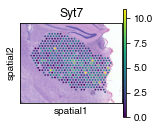

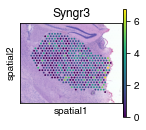

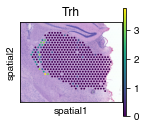

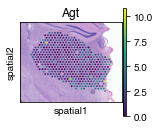

In [31]:
with rc_context({"figure.figsize": (2, 2)}):
    for gene in ("Syt7", "Syngr3", "Trh", "Agt"):
        sc.pl.spatial(data_normalized[data.obs.segmentation_labels == 5, :], color=gene, return_fig=True).savefig(f"figures/3f_{gene}.svg")

In [ ]:
with pd.ExcelWriter("figures/table_s_mouse_brain.xlsx") as ew:
    svg_full[["gene", "pval", "padj"]].to_excel(ew, sheet_name="SV genes whole slice", index=False)
    svg[["gene", "pval", "padj", "label"]].rename(columns={"label": "region"}).to_excel(ew, sheet_name="SV genes per region", index=False)
    go_enrichment.rename(columns={"region": "region_name", "label": "region"}).to_excel(ew, sheet_name="SV genes GO enrichment", index=False)
    data.obs[["segmentation_labels_default", "segmentation_labels"]].reset_index().rename(columns={"index": "spatial_barcode", "segmentation_labels": "region", "segmentation_labels_names": "region_name"}).to_excel(ew, sheet_name="segmentation (counts)", index=False)